## Project: Titanic Survival Exploration

In 1912, the ship RMS Titanic struck an iceberg on its maiden voyage and sank, resulting in the deaths of most of its passengers and crew. In this introductory project, we will explore a subset of the RMS Titanic passenger manifest to determine which features best predict whether someone survived or did not survive. 

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the dataset
in_file = 'train.csv'
full_data = pd.read_csv(in_file)

test = pd.read_csv("test.csv")
IDtest = test["PassengerId"]

# Print the first few entries of the RMS Titanic data
display(full_data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


From a sample of the RMS Titanic data, we can see the various features present for each passenger on the ship:
- **Survived**: Outcome of survival (0 = No; 1 = Yes)
- **Pclass**: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
- **Name**: Name of passenger
- **Sex**: Sex of the passenger
- **Age**: Age of the passenger (Some entries contain `NaN`)
- **SibSp**: Number of siblings and spouses of the passenger aboard
- **Parch**: Number of parents and children of the passenger aboard
- **Ticket**: Ticket number of the passenger
- **Fare**: Fare paid by the passenger
- **Cabin** Cabin number of the passenger (Some entries contain `NaN`)
- **Embarked**: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

Now let's look at some basic statistics

In [2]:
full_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The count variable shows that 177 values are missing in the Age column.
One solution is to replace the null values with the median age which is more robust to outliers than the mean.

In [3]:
full_data['Age'].fillna(full_data['Age'].median(), inplace=True)


In [4]:
full_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Detect and Drop Outliers

In [5]:
# Outlier detection 
from collections import Counter

def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# detect outliers from Age, SibSp , Parch and Fare
Outliers_to_drop = detect_outliers(full_data,2,["Age","SibSp","Parch","Fare"])

Here the Tukey method (Tukey JW., 1977) to detect ouliers which defines an interquartile range comprises between the 1st and 3rd quartile of the distribution values (IQR) is implemented. An outlier is a row that have a feature value outside the (IQR +- an outlier step).

In [6]:
full_data.loc[Outliers_to_drop] # Show the outliers rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.00,3,2,19950,263.0000,C23 C25 C27,S
587,588,1,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.00,1,1,13567,79.2000,B41,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.00,3,2,19950,263.0000,C23 C25 C27,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.00,4,2,347082,31.2750,NaN,S
642,643,0,3,"Skoog, Miss. Margit Elizabeth",female,2.00,3,2,347088,27.9000,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,28.00,8,2,CA. 2343,69.5500,NaN,S
659,660,0,1,"Newell, Mr. Arthur Webster",male,58.00,0,2,35273,113.2750,D48,C
159,160,0,3,"Sage, Master. Thomas Henry",male,28.00,8,2,CA. 2343,69.5500,NaN,S


We detect 10 outliers, for the 28,89 and 342 passenger have an high Ticket Fare
The 7 others have very high values of SibSP.

In [7]:
# Drop outliers
full_data = full_data.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

Since we're interested in the outcome of survival for each passenger or crew member, we can remove the **Survived** feature from this dataset and store it as its own separate variable `outcomes`. We will use these outcomes as our prediction targets.  
Run the code cell below to remove **Survived** as a feature of the dataset and store it in `outcomes`.

In [8]:
# Store the 'Survived' feature in a new variable and remove it from the dataset
outcomes = full_data['Survived']
data = full_data.drop('Survived', axis = 1)

# Show the new dataset with 'Survived' removed
display(data.head())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Visualizations

***
Let's take a look at whether the feature **Sex** has any indication of survival rates among passengers using the `survival_stats` function. This function is defined in the `visuals.py` Python script included with this project. The first two parameters passed to the function are the RMS Titanic data and passenger survival outcomes, respectively. The third parameter indicates which feature we want to plot survival statistics across.  
Run the code cell below to plot the survival outcomes of passengers based on their sex.

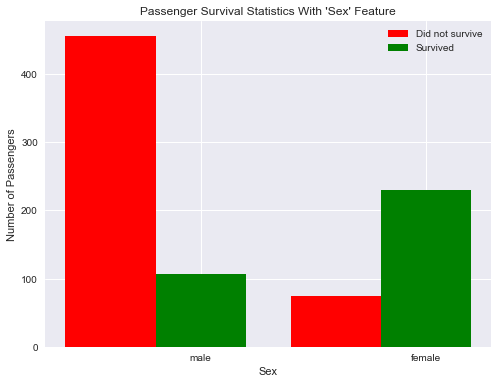

In [9]:
vs.survival_stats(data, outcomes, 'Sex')

So women are more likely to survive.

Now, let's consider using an additional feature to see if we can further improve our predictions. For example, consider all of the male passengers aboard the RMS Titanic: Can we find a subset of those passengers that had a higher rate of survival? Let's start by looking at the **Age** of each male, by again using the `survival_stats` function. This time, we'll use a fourth parameter to filter out the data so that only passengers with the **Sex** 'male' will be included.  
Run the code cell below to plot the survival outcomes of male passengers based on their age.

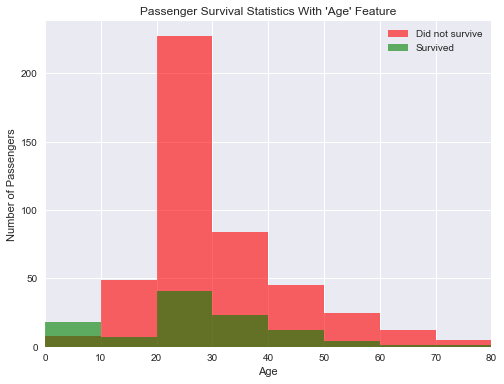

In [10]:
vs.survival_stats(data, outcomes, 'Age', ["Sex == 'male'"])

Examining the survival statistics, the majority of males younger than 10 survived the ship sinking, whereas most males age 10 or older *did not survive* the ship sinking.

Now let's see whether passenger class played any role or not.

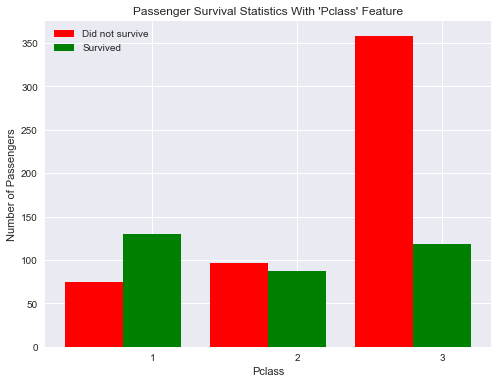

In [11]:
vs.survival_stats(data, outcomes, 'Pclass')

Passengers in the First and Second classes are more likely to survive. Passengers in the third class are not. We can also see the same thing from the factorplot below.

To double check, we can plot the survival rate against the fare too.

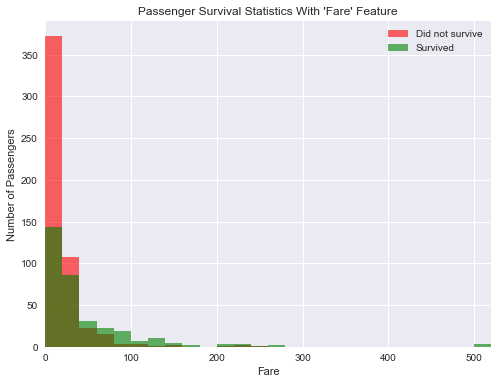

In [12]:
vs.survival_stats(data, outcomes, 'Fare')

So these last two plots confirms our suspicion that wealthy passengers had a greater chance of survival.

Now let's combine age, passenger class and survival

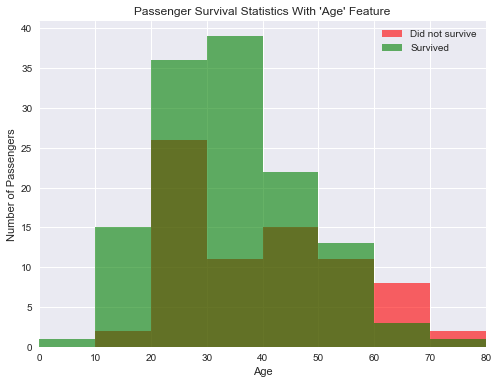

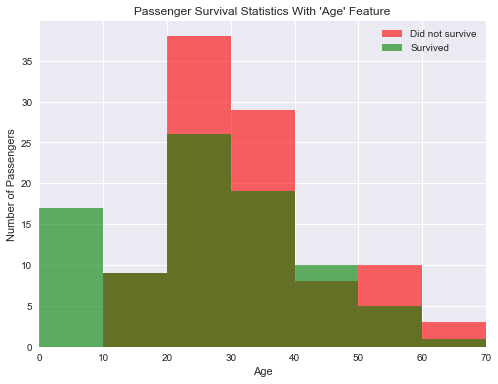

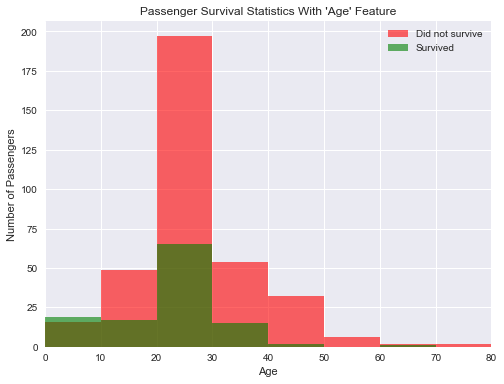

In [13]:
vs.survival_stats(data, outcomes, 'Age',["Pclass == 1"])
vs.survival_stats(data, outcomes, 'Age',["Pclass == 2"])
vs.survival_stats(data, outcomes, 'Age',["Pclass == 3"])

The distinct age range was 15-50 combined with the 3rd class which showed the most death rate.

Now let's try to analyze the fields 'SibSp' and 'Parch'. These two columns indicate whether the passenger was travelling alone or with siblings/spouses or parents/children and see whether these played any role towards the survival rate.

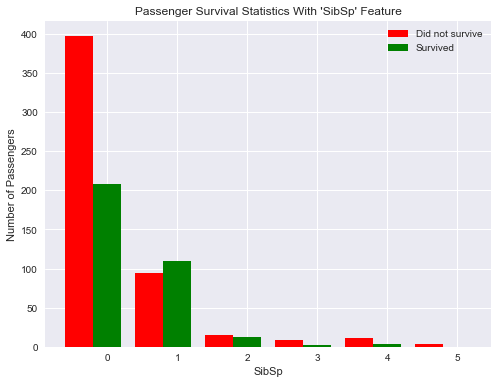

In [14]:
vs.survival_stats(data, outcomes, 'SibSp')

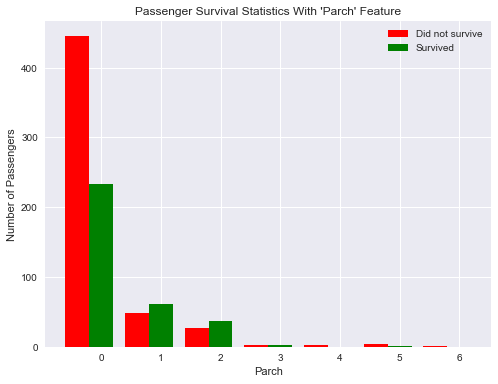

In [15]:
vs.survival_stats(data, outcomes, 'Parch')

So we see passengers travelling alone had a lower survival rate than passengers travelling with family.

### Feature Engineering

We spotted some cool correlations between the features uptil now. Now we will do some feature engineering to get some new interesting features and also transform some of the existing features which we couldn't analyze for its complexity.

### Loading the data
One trick when starting a machine learning problem is to combine the training set and the test set together. This is a useful technique especially when your test set appears to have a feature that doesn't exist in the training set. Therefore, if we don't combine the two sets, testing our model on the test set will dramatically fail.
Besides, combining the two sets will save us some repeated work to do later on when testing.
The procedure is quite simple.

 - We start by loading the train set and the test set.
 - We create an empty dataframe called combined.
 - Then we append test to train and affect the result to combined.

In [16]:
def get_combined_data():
    # reading train data
    train = pd.read_csv('train.csv')
    
    # reading test data
    test = pd.read_csv('test.csv')

    # extracting and then removing the targets from the training data 
    targets = train.Survived
    train.drop('Survived', 1, inplace=True)
    

    # merging train data and test data for future feature engineering
    combined = train.append(test)
    combined.reset_index(inplace=True)
    combined.drop('index', inplace=True, axis=1)
    
    return combined

In [17]:
combined = get_combined_data()

In [18]:
combined.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Extracting Passenger Titles

We see that for each passenger, there is a title associated with his/her name. It might be something as simple as Mr, Mrs etc. But it can be something uncommon too which might give us more insight about that person's social status and then we can actually derive some information from it and the causal effect on the survivalibility. So first we will try to extract the title. 

In [19]:
def get_titles():

    global combined
    
    # we extract the title from each name
    combined['Title'] = combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    # a map of more aggregated titles
    Title_Dictionary = {
                        "Capt":       "Officer",
                        "Col":        "Officer",
                        "Major":      "Officer",
                        "Jonkheer":   "Royalty",
                        "Don":        "Royalty",
                        "Sir" :       "Royalty",
                        "Dr":         "Officer",
                        "Rev":        "Officer",
                        "the Countess":"Royalty",
                        "Dona":       "Royalty",
                        "Mme":        "Mrs",
                        "Mlle":       "Miss",
                        "Ms":         "Mrs",
                        "Mr" :        "Mr",
                        "Mrs" :       "Mrs",
                        "Miss" :      "Miss",
                        "Master" :    "Master",
                        "Lady" :      "Royalty"

                        }
    
    # we map each title
    combined['Title'] = combined.Title.map(Title_Dictionary)

Let's run it to add the new column 'Title' to the dataframe.

In [20]:
get_titles()

combined.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


### Processing the ages

Previously we replaced the NaN values of the 'Age' column with the median value. But this might not be the best idea given the fact that age can be correlated to the title, pclass and sex. Let's try to see if there are indeed any differences when grouped by these features.

In [21]:
grouped_train = combined.head(891).groupby(['Sex','Pclass','Title'])
grouped_median_train = grouped_train.median()

grouped_test = combined.iloc[891:].groupby(['Sex','Pclass','Title'])
grouped_median_test = grouped_test.median()

In [22]:
grouped_median_train

PassengerId   Age  SibSp  Parch       Fare
Sex    Pclass Title                                              
female 1      Miss           369.0  30.0    0.0    0.0   88.25000
              Mrs            499.0  40.0    1.0    0.0   79.20000
              Officer        797.0  49.0    0.0    0.0   25.92920
              Royalty        658.5  40.5    0.5    0.0   63.05000
       2      Miss           437.5  24.0    0.0    0.0   13.00000
              Mrs            439.5  31.5    1.0    0.0   26.00000
       3      Miss           372.0  18.0    0.0    0.0    8.75625
              Mrs            405.5  31.0    1.0    1.0   15.97500
male   1      Master         446.0   4.0    1.0    2.0  120.00000
              Mr             463.0  40.0    0.0    0.0   42.40000
              Officer        648.0  51.0    0.0    0.0   35.50000
              Royalty        600.0  40.0    0.0    0.0   27.72080
       2      Master         408.0   1.0    1.0    1.0   26.00000
              Mr             440.0  31.0    0.0    0.0   13.00000
              Officer        358.5  46.5    0.0    0.0   13.00000
       3      Master         270.5   4.0    3.5    1.0   28.51250
              Mr             472.0  26.0    0.0    0.0    7.89580

In [23]:
grouped_median_test

PassengerId   Age  SibSp  Parch       Fare
Sex    Pclass Title                                              
female 1      Miss          1074.0  32.0    0.0    0.0  158.20835
              Mrs           1076.0  48.0    1.0    0.0   63.35830
              Royalty       1306.0  39.0    0.0    0.0  108.90000
       2      Miss          1121.0  19.5    1.0    1.0   24.50000
              Mrs           1123.5  29.0    0.0    0.0   26.00000
       3      Miss          1090.5  22.0    0.0    0.0    7.87920
              Mrs           1048.0  28.0    1.0    0.5   14.28125
male   1      Master        1022.0   9.5    1.0    2.0  198.43750
              Mr            1102.0  42.0    0.0    0.0   50.24790
              Officer       1094.0  53.0    1.0    0.0   81.85830
       2      Master        1033.5   5.0    0.5    1.5   27.75000
              Mr            1156.0  28.0    0.0    0.0   13.00000
              Officer       1048.5  35.5    0.5    0.5   19.50000
       3      Master        1173.0   7.0    1.0    1.0   15.24580
              Mr            1101.0  25.0    0.0    0.0    7.85420

Look at the median age column and see how this value can be different based on the Sex, Pclass and Title put together.
For example:

 - If the passenger is female, from Pclass 1, and from royalty the median age is 39.
 - If the passenger is male, from Pclass 3, with a Mr title, the median age is 26.
 
Let's create a function that fills in the missing age in ** combined ** based on these different attributes.

In [24]:
def process_age():
    
    global combined
    
    # a function that fills the missing values of the Age variable
    
    def fillAges(row, grouped_median):
        if row['Sex']=='female' and row['Pclass'] == 1:
            if row['Title'] == 'Miss':
                return grouped_median.loc['female', 1, 'Miss']['Age']
            elif row['Title'] == 'Mrs':
                return grouped_median.loc['female', 1, 'Mrs']['Age']
            elif row['Title'] == 'Officer':
                return grouped_median.loc['female', 1, 'Officer']['Age']
            elif row['Title'] == 'Royalty':
                return grouped_median.loc['female', 1, 'Royalty']['Age']

        elif row['Sex']=='female' and row['Pclass'] == 2:
            if row['Title'] == 'Miss':
                return grouped_median.loc['female', 2, 'Miss']['Age']
            elif row['Title'] == 'Mrs':
                return grouped_median.loc['female', 2, 'Mrs']['Age']

        elif row['Sex']=='female' and row['Pclass'] == 3:
            if row['Title'] == 'Miss':
                return grouped_median.loc['female', 3, 'Miss']['Age']
            elif row['Title'] == 'Mrs':
                return grouped_median.loc['female', 3, 'Mrs']['Age']

        elif row['Sex']=='male' and row['Pclass'] == 1:
            if row['Title'] == 'Master':
                return grouped_median.loc['male', 1, 'Master']['Age']
            elif row['Title'] == 'Mr':
                return grouped_median.loc['male', 1, 'Mr']['Age']
            elif row['Title'] == 'Officer':
                return grouped_median.loc['male', 1, 'Officer']['Age']
            elif row['Title'] == 'Royalty':
                return grouped_median.loc['male', 1, 'Royalty']['Age']

        elif row['Sex']=='male' and row['Pclass'] == 2:
            if row['Title'] == 'Master':
                return grouped_median.loc['male', 2, 'Master']['Age']
            elif row['Title'] == 'Mr':
                return grouped_median.loc['male', 2, 'Mr']['Age']
            elif row['Title'] == 'Officer':
                return grouped_median.loc['male', 2, 'Officer']['Age']

        elif row['Sex']=='male' and row['Pclass'] == 3:
            if row['Title'] == 'Master':
                return grouped_median.loc['male', 3, 'Master']['Age']
            elif row['Title'] == 'Mr':
                return grouped_median.loc['male', 3, 'Mr']['Age']
    
    combined.head(891).Age = combined.head(891).apply(lambda r : fillAges(r, grouped_median_train) if np.isnan(r['Age']) 
                                                      else r['Age'], axis=1)
    
    combined.iloc[891:].Age = combined.iloc[891:].apply(lambda r : fillAges(r, grouped_median_test) if np.isnan(r['Age']) 
                                                      else r['Age'], axis=1)
    

In [26]:
process_age()

In [27]:
combined.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,2.294882,29.223583,0.498854,0.385027,33.295479
std,378.020061,0.837836,13.387233,1.041658,0.865560,51.758668
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,982.000000,3.000000,36.500000,1.000000,0.000000,31.275000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200


So we see that the ages have been successfully replaced.

### Processing titles

So now even though we have a 'Title' column, it's very hard for machine to understand the values. So we will one hot encode it to spread the data and then as we don't need the passenger names anymore, we will frop the column.

In [29]:
def process_names():
    
    global combined
    # we clean the Name variable
    combined.drop('Name',axis=1,inplace=True)
    
    # encoding in dummy variable
    titles_dummies = pd.get_dummies(combined['Title'],prefix='Title')
    combined = pd.concat([combined,titles_dummies],axis=1)
    
    # removing the title variable
    combined.drop('Title',axis=1,inplace=True)
    


In [30]:
process_names()

In [31]:
combined.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,1,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,0
1,2,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1,0,0
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0,0
3,4,1,female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1,0,0
4,5,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,0,0


Perfect! We have one hot encoded this column into multiple columns of binary variables.

### Processing Fares

Now we will replace the 'NaN' fare values with the mean value.

In [32]:
def process_fares():
    
    global combined
    # there's one missing fare value - replacing it with the mean.
    combined.head(891).Fare.fillna(combined.head(891).Fare.mean(), inplace=True)
    combined.iloc[891:].Fare.fillna(combined.iloc[891:].Fare.mean(), inplace=True)
    


In [34]:
process_fares()

### Processing Embarkment

In [35]:
def process_embarked():
    
    global combined
    # two missing embarked values - filling them with the most frequent one (S)
    combined.head(891).Embarked.fillna('S', inplace=True)
    combined.iloc[891:].Embarked.fillna('S', inplace=True)
    
    
    # dummy encoding 
    embarked_dummies = pd.get_dummies(combined['Embarked'],prefix='Embarked')
    combined = pd.concat([combined,embarked_dummies],axis=1)
    combined.drop('Embarked',axis=1,inplace=True)
    


In [36]:
process_embarked()

### Processing Cabins

Now we will replace NaN values with U (for Unknow). We will then maps each Cabin value to the first letter and Then encode the cabin values using dummy encoding again.

In [37]:
def process_cabin():
    
    global combined
    
    # replacing missing cabins with U (for Uknown)
    combined.Cabin.fillna('U', inplace=True)
    
    # mapping each Cabin value with the cabin letter
    combined['Cabin'] = combined['Cabin'].map(lambda c : c[0])
    
    # dummy encoding ...
    cabin_dummies = pd.get_dummies(combined['Cabin'], prefix='Cabin')
    
    combined = pd.concat([combined,cabin_dummies], axis=1)
    
    combined.drop('Cabin', axis=1, inplace=True)
    

In [38]:
process_cabin()

In [39]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 26 columns):
PassengerId      1309 non-null int64
Pclass           1309 non-null int64
Sex              1309 non-null object
Age              1309 non-null float64
SibSp            1309 non-null int64
Parch            1309 non-null int64
Ticket           1309 non-null object
Fare             1309 non-null float64
Title_Master     1309 non-null uint8
Title_Miss       1309 non-null uint8
Title_Mr         1309 non-null uint8
Title_Mrs        1309 non-null uint8
Title_Officer    1309 non-null uint8
Title_Royalty    1309 non-null uint8
Embarked_C       1309 non-null uint8
Embarked_Q       1309 non-null uint8
Embarked_S       1309 non-null uint8
Cabin_A          1309 non-null uint8
Cabin_B          1309 non-null uint8
Cabin_C          1309 non-null uint8
Cabin_D          1309 non-null uint8
Cabin_E          1309 non-null uint8
Cabin_F          1309 non-null uint8
Cabin_G          1309 non-null uint8

So now our cabins are also separated into separate columns.

In [40]:
combined.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,...,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,1,3,male,22.0,1,0,A/5 21171,7.2500,0,0,...,1,0,0,0,0,0,0,0,0,1
1,2,1,female,38.0,1,0,PC 17599,71.2833,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,0,1,...,1,0,0,0,0,0,0,0,0,1
3,4,1,female,35.0,1,0,113803,53.1000,0,0,...,1,0,0,1,0,0,0,0,0,0
4,5,3,male,35.0,0,0,373450,8.0500,0,0,...,1,0,0,0,0,0,0,0,0,1


### Processing Sex

Now we will map male to 1 and female to 0.

In [41]:
def process_sex():
    
    global combined
    # mapping string values to numerical one 
    combined['Sex'] = combined['Sex'].map({'male':1,'female':0})
    

In [42]:
process_sex()

### Processing PClass

Similarly we will again one hot encode the passenger class and then drop the original pclass column.

In [43]:
def process_pclass():
    
    global combined
    # encoding into 3 categories:
    pclass_dummies = pd.get_dummies(combined['Pclass'], prefix="Pclass")
    
    # adding dummy variables
    combined = pd.concat([combined,pclass_dummies],axis=1)
    
    # removing "Pclass"
    
    combined.drop('Pclass',axis=1,inplace=True)
    

In [44]:
process_pclass()

### Processing Tickets

 - This functions preprocess the tikets first by extracting the ticket prefix. When it fails in extracting a prefix it returns XXX.
 - Then it encodes prefixes using dummy encoding.

In [45]:
def process_ticket():
    
    global combined
    
    # a function that extracts each prefix of the ticket, returns 'XXX' if no prefix (i.e the ticket is a digit)
    def cleanTicket(ticket):
        ticket = ticket.replace('.','')
        ticket = ticket.replace('/','')
        ticket = ticket.split()
        ticket = map(lambda t : t.strip(), ticket)
        ticket = filter(lambda t : not t.isdigit(), ticket)
        if len(ticket) > 0:
            return ticket[0]
        else: 
            return 'XXX'
    

    # Extracting dummy variables from tickets:

    combined['Ticket'] = combined['Ticket'].map(cleanTicket)
    tickets_dummies = pd.get_dummies(combined['Ticket'], prefix='Ticket')
    combined = pd.concat([combined, tickets_dummies], axis=1)
    combined.drop('Ticket', inplace=True, axis=1)


In [46]:
process_ticket()

### Processing Family

This part includes creating new variables based on the size of the family (the size is by the way, another variable we create).
This creation of new variables is done under a realistic assumption: Large families are grouped together, hence they are more likely to get rescued than people traveling alone.

In [47]:
def process_family():
    
    global combined
    # introducing a new feature : the size of families (including the passenger)
    combined['FamilySize'] = combined['Parch'] + combined['SibSp'] + 1
    
    # introducing other features based on the family size
    combined['Singleton'] = combined['FamilySize'].map(lambda s: 1 if s == 1 else 0)
    combined['SmallFamily'] = combined['FamilySize'].map(lambda s: 1 if 2<=s<=4 else 0)
    combined['LargeFamily'] = combined['FamilySize'].map(lambda s: 1 if 5<=s else 0)

This function introduces 4 new features:

 - FamilySize : the total number of relatives including the passenger (him/her)self.
 - Singleton : a boolean variable that describes families of size = 1
 - SmallFamily : a boolean variable that describes families of 2 <= size <= 4
 - LargeFamily : a boolean variable that describes families of 5 < size

In [48]:
process_family()

In [49]:
combined.shape
combined.head()

,PassengerId,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,...,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,FamilySize,Singleton,SmallFamily,LargeFamily
0,1,1,22.0,1,0,7.2500,0,0,1,0,...,0,0,0,0,0,0,2,0,1,0
1,2,0,38.0,1,0,71.2833,0,0,0,1,...,0,0,0,0,0,0,2,0,1,0
2,3,0,26.0,0,0,7.9250,0,1,0,0,...,1,0,0,0,0,0,1,1,0,0
3,4,0,35.0,1,0,53.1000,0,0,0,1,...,0,0,0,0,0,1,2,0,1,0
4,5,1,35.0,0,0,8.0500,0,0,1,0,...,0,0,0,0,0,1,1,1,0,0


So right now we have ended with 68 features. Let's get rid of the 'PassengerId' column as it is useless.

In [50]:
combined.drop('PassengerId', inplace=True, axis=1)

In [51]:
combined.head()

,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,...,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,FamilySize,Singleton,SmallFamily,LargeFamily
0,1,22.0,1,0,7.2500,0,0,1,0,0,...,0,0,0,0,0,0,2,0,1,0
1,0,38.0,1,0,71.2833,0,0,0,1,0,...,0,0,0,0,0,0,2,0,1,0
2,0,26.0,0,0,7.9250,0,1,0,0,0,...,1,0,0,0,0,0,1,1,0,0
3,0,35.0,1,0,53.1000,0,0,0,1,0,...,0,0,0,0,0,1,2,0,1,0
4,1,35.0,0,0,8.0500,0,0,1,0,0,...,0,0,0,0,0,1,1,1,0,0


### Modelling

We will first use Random Forest and then we will implement GridSearchCV along with stratified k-fold cross validation to fine tune our model. But first we will recover our training set and testing set from the combined data. We will also define a scoring function. 

Ultimately we will implement an ensemble method using 10 most popular classifiers.

In [52]:
def recover_train_test_target():
    global combined
    
    train0 = pd.read_csv('train.csv')
    
    targets = train0.Survived
    train = combined.head(891)
    test = combined.iloc[891:]
    
    return train, test, targets

In [53]:
X_train, test, Y_train = recover_train_test_target()


In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,recall_score,f1_score
from sklearn.feature_selection import SelectFromModel

clf = RandomForestClassifier(n_estimators=50)
clf = clf.fit(X_train,Y_train)


### Feature importance

Let's look at the importance of each feature.

In [57]:
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

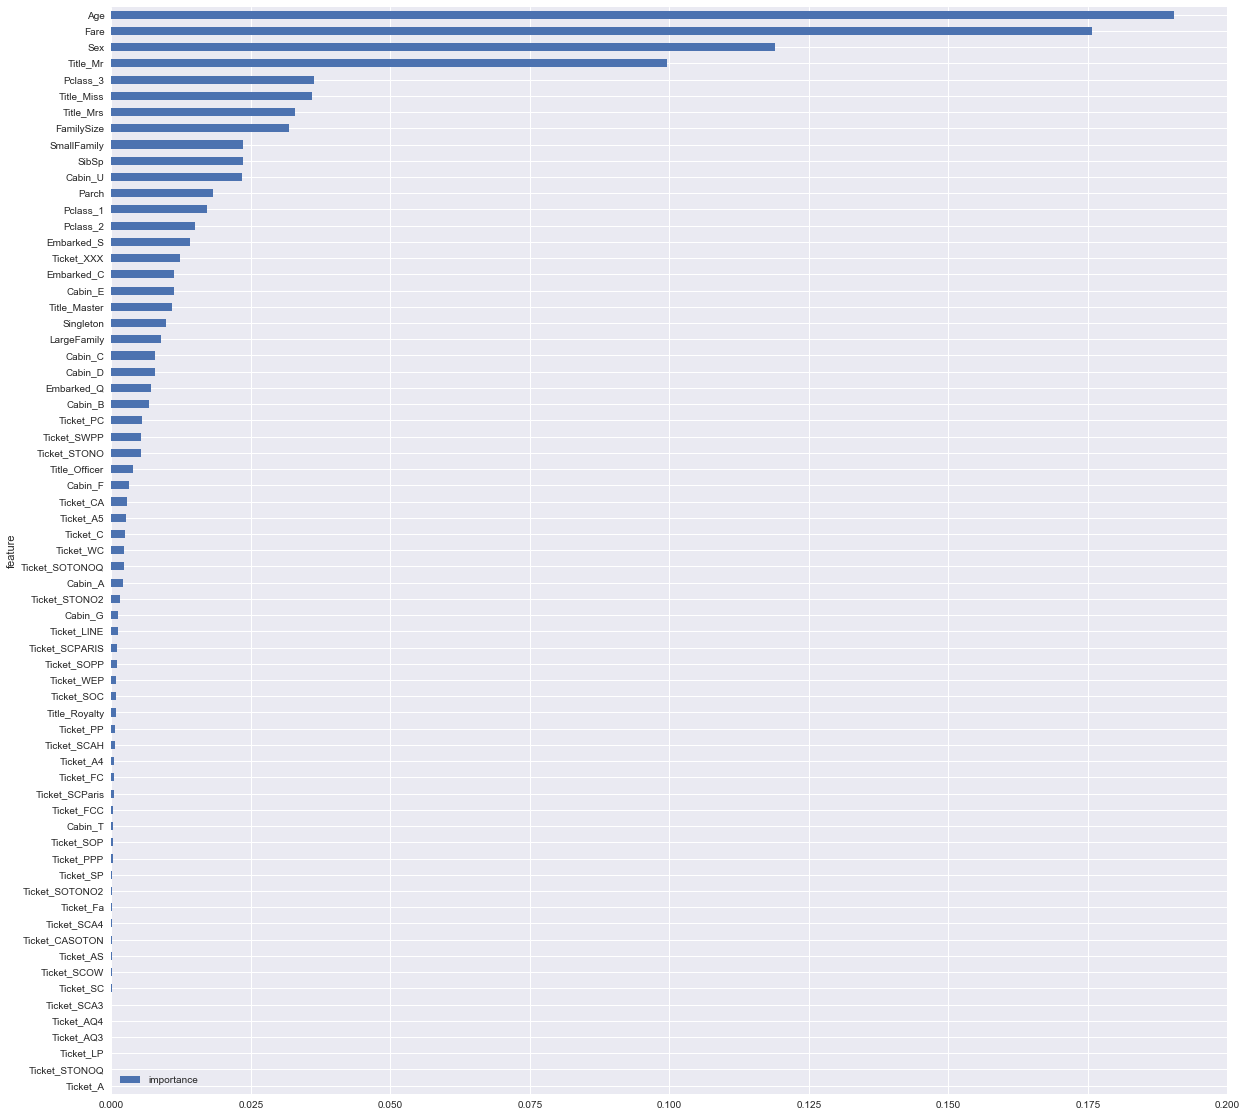

In [58]:
features.plot(kind='barh', figsize=(20, 20))

As you may notice, there is a great importance linked to Age, Fare, Title_Mr and Sex.
Let's now transform our train set and test set in a more compact datasets.

In [60]:
model = SelectFromModel(clf, prefit=True)
train_reduced = model.transform(X_train)
train_reduced.shape

(891L, 13L)

In [61]:
test_reduced = model.transform(test)
test_reduced.shape

(418L, 13L)

So Now we are down to 13 features!

In [63]:
from sklearn.cross_validation import StratifiedKFold
kfold = StratifiedKFold(Y_train, n_folds=10)

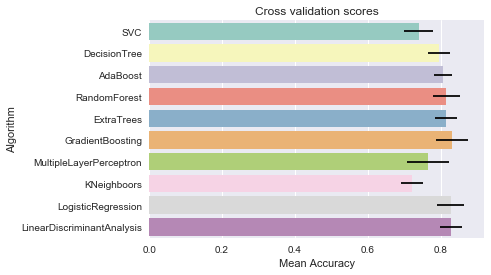

In [64]:
# Modeling step Test differents algorithms 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = Y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

I decided to choose the SVC, AdaBoost, RandomForest , ExtraTrees adn GradientBoosting classifiers for the ensembling modeling.

### Hyperparameter tunning for best models
I performed a grid search optimization for AdaBoost, ExtraTrees , RandomForest, GradientBoosting and SVC classifiers.


In [66]:
# Adaboost
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsadaDTC.fit(X_train,Y_train)

ada_best = gsadaDTC.best_estimator_

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   13.6s
[Parallel(n_jobs=4)]: Done 479 tasks      | elapsed:   18.9s
[Parallel(n_jobs=4)]: Done 1120 out of 1120 | elapsed:   23.1s finished


In [67]:
gsadaDTC.best_score_

0.82379349046015715

In [68]:
#ExtraTrees 
ExtC = ExtraTreesClassifier()


## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsExtC.fit(X_train,Y_train)

ExtC_best = gsExtC.best_estimator_

# Best score
gsExtC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   29.7s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  3.2min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:  3.8min finished


0.83501683501683499

In [69]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,Y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   33.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.6min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  3.5min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:  4.1min finished


0.83838383838383834

In [70]:
# Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X_train,Y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   11.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   21.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   36.3s
[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed:   51.6s finished


0.83613916947250277

In [71]:
### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsSVMC.fit(X_train,Y_train)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   13.7s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   39.7s
[Parallel(n_jobs=4)]: Done 280 out of 280 | elapsed:  1.0min finished


0.81481481481481477

### Plotting the learning curves

By learning curves, we can easily see whether a model is overfitting or not and it is a good measure of whether the accuracy is legit or not. Also, we can see if the model is high bias or high variance based on how close or far the curves are from each other.

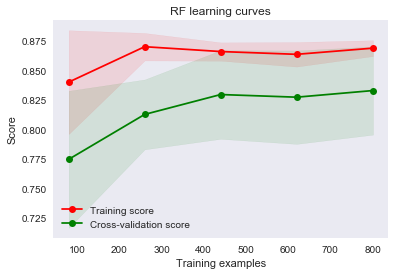

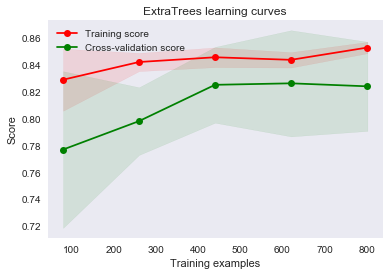

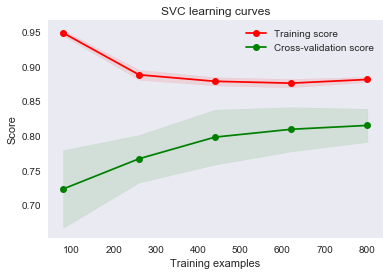

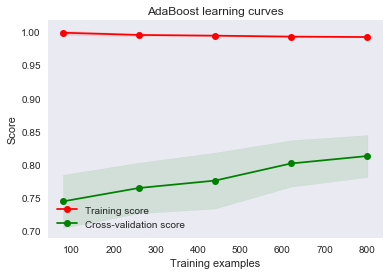

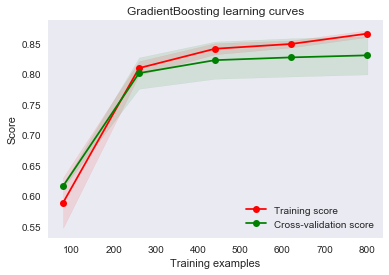

In [73]:
import matplotlib.pyplot as plt

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(gsRFC.best_estimator_,"RF learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsExtC.best_estimator_,"ExtraTrees learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsSVMC.best_estimator_,"SVC learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsadaDTC.best_estimator_,"AdaBoost learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsGBC.best_estimator_,"GradientBoosting learning curves",X_train,Y_train,cv=kfold)

Gradient boosting and Ada boosting seems to overfit the curves as the training score reaches a very high value without much improvement in the cross validation score making it a high variance model.

On the other hand SVC and Extra trees seem to generalize the distribution much better and hence the prediction. We can tell this as the curves ar closer to each other.

### Heat map of the classifiers

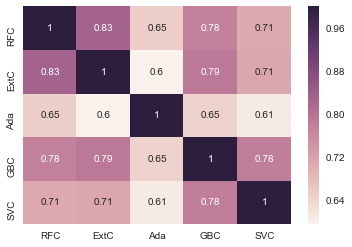

In [74]:
test_Survived_RFC = pd.Series(RFC_best.predict(test), name="RFC")
test_Survived_ExtC = pd.Series(ExtC_best.predict(test), name="ExtC")
test_Survived_SVMC = pd.Series(SVMC_best.predict(test), name="SVC")
test_Survived_AdaC = pd.Series(ada_best.predict(test), name="Ada")
test_Survived_GBC = pd.Series(GBC_best.predict(test), name="GBC")


# Concatenate all classifier results
ensemble_results = pd.concat([test_Survived_RFC,test_Survived_ExtC,test_Survived_AdaC,test_Survived_GBC, test_Survived_SVMC],axis=1)


g= sns.heatmap(ensemble_results.corr(),annot=True)

The 5 classifiers give more or less the same prediction but there is some differences. Theses differences between the 5 classifier predictions are sufficient to consider an ensembling vote.

### Ensemble modeling and Voting

In [75]:
votingC = VotingClassifier(estimators=[('rfc', RFC_best), ('extc', ExtC_best),
('svc', SVMC_best), ('adac',ada_best),('gbc',GBC_best)], voting='soft', n_jobs=4)

votingC = votingC.fit(X_train,Y_train)

### Making the output file for Kaggle

In [76]:
test_Survived = pd.Series(votingC.predict(test), name="Survived")

results = pd.concat([IDtest,test_Survived],axis=1)

results.to_csv("ensemble_voting.csv",index=False)